# Preprocessing Steps

In this notebook, I will outline a couple of key preprocessing steps we could possibly use in order to acquire a better representation of our data.

In [1]:
import sys
import numpy as np
sys.path.insert(0, '/home/emmanuel/projects/2020_ml_ocn/ml4ocean/src')

from data.make_dataset import DataLoad

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

## North Atlantic

### Outputs

In [50]:
dataloader = DataLoad()

X, Y = dataloader.load_control_data('na')

X = X[dataloader.core_vars + dataloader.loc_vars]
Y = Y.drop(dataloader.meta_vars, axis=1)

In [51]:
import matplotlib.colors as colors

def plot_bbp_profile(dataframe: pd.DataFrame):
    norm = colors.LogNorm(vmin=dataframe.values.min()+1e-10, vmax=dataframe.values.max())
    
    fig, ax = plt.subplots(figsize=(50,50))
    ax.imshow(dataframe.T, cmap='viridis', norm=norm)
    plt.show()

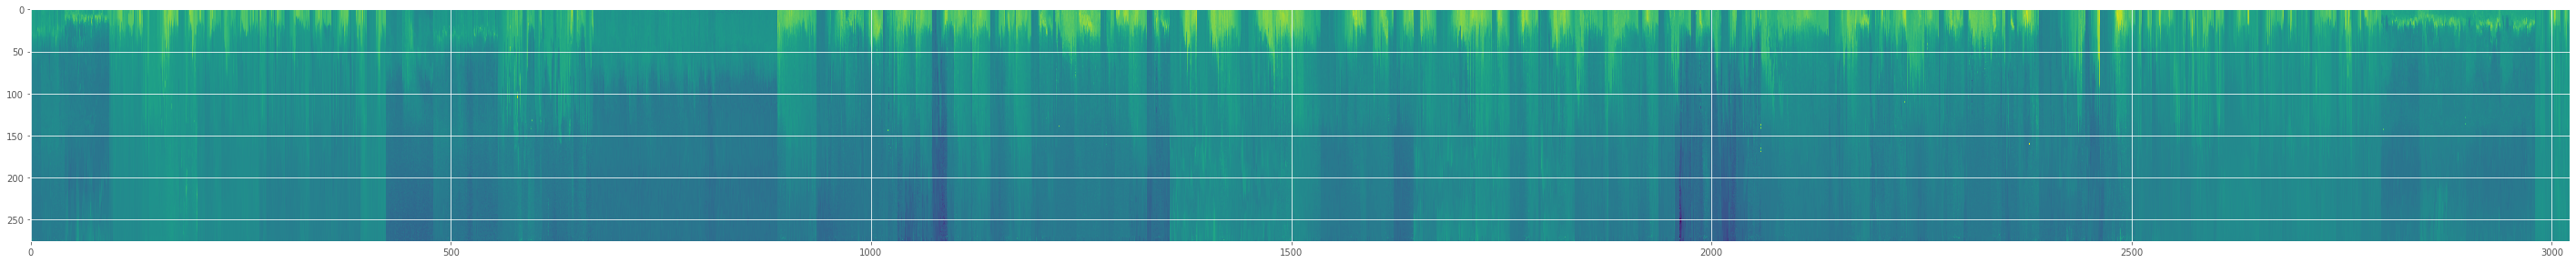

In [46]:
plot_bbp_profile(Y)

### Log Transformation

This is a very simple but a very common transformation used in the sciences. I think it will highlight some of aspects near the surface because it essentially scales the regions near the beginning of the distribution. This is very similar to what we observed in our outputs. It might not be necessary for all of our inputs but it will probably be necessary for the outputs. I have heard the transforming the Mixed Layer Depth (MLD) might also improve the representation as well.

$$\tilde{Y} = log(Y)$$
$$Y = \exp{\tilde{Y}}$$


In [53]:
np.log(Y).describe()

,X1,X3,X5,X7,X9,X11,X13,X15,X17,X19,...,X955,X960,X965,X970,X975,X980,X985,X990,X995,X1000
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,...,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,-6.610019,-6.604541,-6.598069,-6.588615,-6.578833,-6.570708,-6.564953,-6.560964,-6.559300,-6.560529,...,-8.233790,-8.232517,-8.230565,-8.228788,-8.224080,-8.227809,-8.235910,-8.250272,-8.258900,-8.267904
std,0.774408,0.780557,0.788205,0.793829,0.794846,0.798021,0.798245,0.797818,0.797393,0.793843,...,0.376047,0.378086,0.379638,0.376723,0.378766,0.389448,0.392392,0.397019,0.404492,0.401916
min,-8.821682,-8.740337,-8.804875,-8.740337,-8.622554,-8.679712,-8.679712,-8.679712,-8.622554,-8.622554,...,-10.260163,-10.312530,-10.596643,-10.240126,-10.438404,-11.512925,-10.126631,-10.126631,-10.414313,-10.414313
25%,-7.264430,-7.277614,-7.278819,-7.277014,-7.264430,-7.264430,-7.272168,-7.268560,-7.278819,-7.278819,...,-8.468403,-8.468403,-8.468403,-8.468403,-8.468403,-8.468403,-8.499696,-8.517193,-8.517193,-8.517193
50%,-6.547248,-6.536192,-6.535683,-6.515713,-6.503603,-6.489045,-6.477599,-6.469500,-6.469500,-6.463711,...,-8.254829,-8.254829,-8.254829,-8.254829,-8.254829,-8.254829,-8.272543,-8.294050,-8.294050,-8.294050
75%,-5.982753,-5.976577,-5.963849,-5.948922,-5.936976,-5.928780,-5.925677,-5.921939,-5.920283,-5.920160,...,-7.929407,-7.929407,-7.928623,-7.925415,-7.915873,-7.902079,-7.907938,-7.929407,-7.929407,-7.943206
max,-4.454167,-4.416204,-4.247321,-4.203044,-4.287444,-4.220588,-4.220588,-4.224308,-4.246622,-4.323003,...,-6.927958,-6.927958,-6.927958,-6.858965,-6.927958,-6.529319,-6.838537,-6.843842,-6.431521,-6.843842


### Standard Preprocessing

#### Remove the Mean

The is a super common transformation and it's typically the transformation we start with. It just involves removing the mean, $\mu$.

$$\tilde{y} = y - \mu_y$$

We can use the sklearn function `sklearn.preprocessing.StandardScaler()` to perform the normalization.

**Note**: I don't tranasform the lat, lon, doy coordinates. I think think there are smarter transformations for those variables. Outlined below.

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer


y_normalizer = MinMaxScaler()

Y_ = y_normalizer.fit_transform(Y)
Y_norm = Y.copy()
Y_norm[:] = Y_

In [62]:
Y_norm.describe()

,X1,X3,X5,X7,X9,X11,X13,X15,X17,X19,...,X955,X960,X965,X970,X975,X980,X985,X990,X995,X1000
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,...,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,0.143644,0.138826,0.119232,0.115067,0.125491,0.119197,0.119850,0.120614,0.122737,0.131864,...,0.264012,0.265874,0.272893,0.246764,0.271577,0.191379,0.238136,0.235840,0.158472,0.238760
std,0.122766,0.120741,0.104573,0.101866,0.112488,0.106343,0.106323,0.106031,0.107613,0.114200,...,0.113137,0.112791,0.112522,0.106515,0.114330,0.077994,0.109864,0.109276,0.073028,0.106416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048117,0.044533,0.038156,0.035920,0.038348,0.036501,0.036130,0.036440,0.036087,0.038991,...,0.185185,0.186722,0.193717,0.171836,0.190082,0.137931,0.158510,0.155945,0.107595,0.164093
50%,0.112045,0.108221,0.091909,0.089249,0.097200,0.092975,0.094180,0.095400,0.096940,0.105428,...,0.238095,0.239532,0.246073,0.221131,0.242675,0.172414,0.208822,0.204678,0.139241,0.212355
75%,0.206782,0.199455,0.170995,0.165561,0.181416,0.171607,0.172176,0.173517,0.177211,0.191496,...,0.343915,0.345153,0.351081,0.321142,0.353018,0.248258,0.317749,0.311891,0.208861,0.313771
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


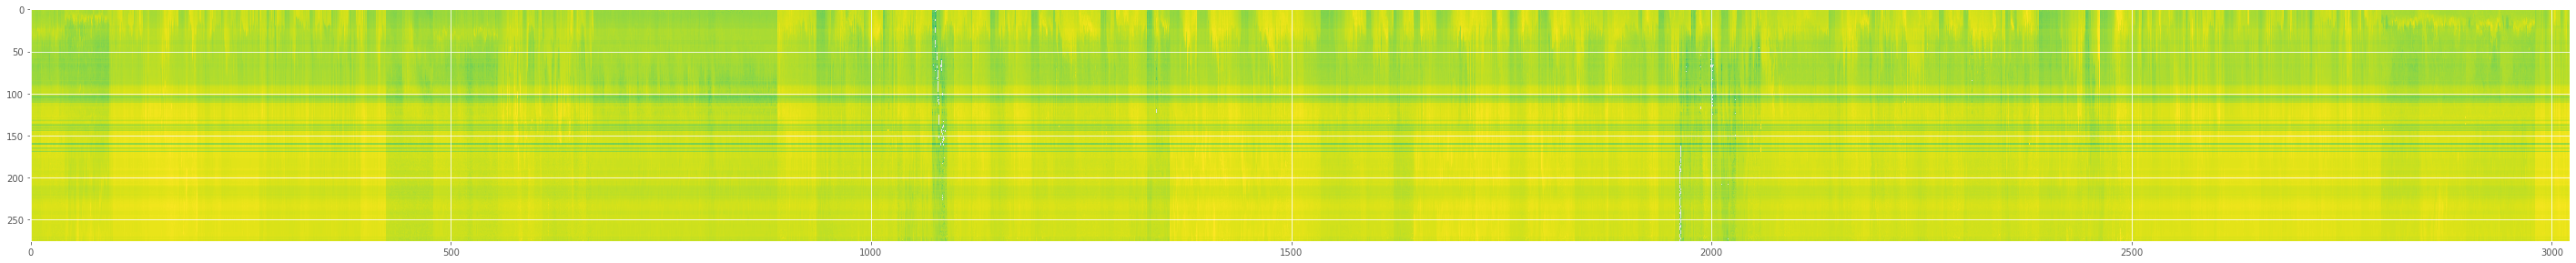

In [58]:
plot_bbp_profile(Y_norm)

### CLustering

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from features.build_features import get_geodataframe
from visualization.visualize import plot_geolocations

In [70]:
clf = KMeans(init='k-means++', n_clusters=4, n_init=10, max_iter=1_000, verbose=None)

clf.fit(Y)

clusters = clf.predict(Y)

In [71]:
clusters.shape

(3022,)

In [72]:
clusters_geo = pd.DataFrame(clusters, columns=['clusters'])

clusters_geo['lat'] = X['lat']
clusters_geo['lon'] = X['lon']

clusters_geo = get_geodataframe(clusters_geo)

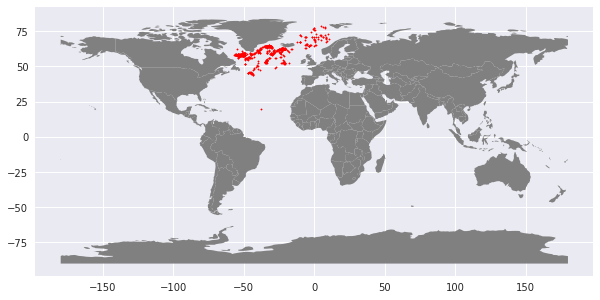

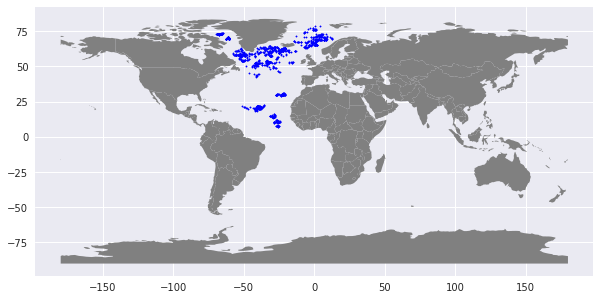

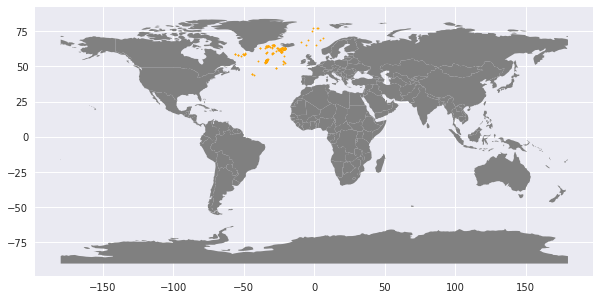

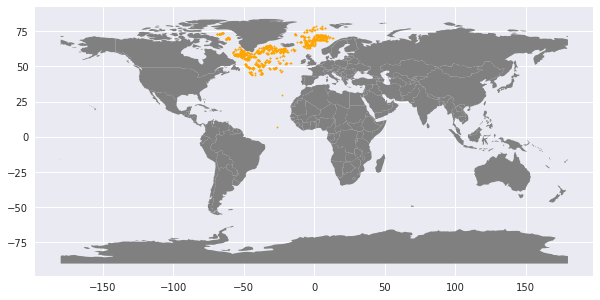

/home/emmanuel/.conda/envs/ml4ocn/lib/python3.6/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


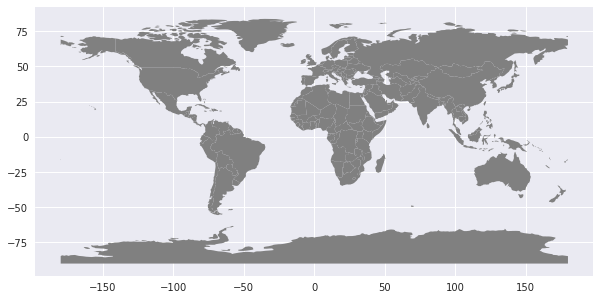

In [74]:
# plot clusters
plot_geolocations(clusters_geo[clusters_geo['clusters']==0], color='red')
plot_geolocations(clusters_geo[clusters_geo['clusters']==1], color='blue')
plot_geolocations(clusters_geo[clusters_geo['clusters']==2], color='orange')
plot_geolocations(clusters_geo[clusters_geo['clusters']==3], color='orange')
plot_geolocations(clusters_geo[clusters_geo['clusters']==4], color='orange')

#### Outputs

We can use the sklearn function `sklearn.` to create

### Log Transform

### Standard Scaling (Mean only...)

### KBinsDiscretization